# Classification - recommend level (by random forest)

In [25]:
# %pip install --upgrade imbalanced-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('./data.csv')

df_rl = df.copy()
df_rl['level'] = pd.cut(df_rl['reviews_per_month'], bins=4, labels=[1, 2, 3, 4])
df_rl.level.value_counts()

1    22271
2     5685
3     3443
4     1857
Name: level, dtype: int64

In [3]:
features = ['neighbourhood_group','latitude', 'longitude', 'neighbourhood','room_type','minimum_nights', 
            'calculated_host_listings_count', 'availability_365','crimes_neigh',
            'CMPLNT_NUM','distance to nearest subway (km)','log_price']

X_clf = df_rl[[col for col in features]]
X_encoded_clf = pd.get_dummies(X_clf,columns = ['room_type','neighbourhood_group','neighbourhood'])
y_clf = df_rl['level']

In [4]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_encoded_clf, y_clf)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=42)

In [5]:
from sklearn.ensemble import RandomForestClassifier

estimators_range = [10, 50, 100, 500, 1000]
scores = []
for n in estimators_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    score = cross_val_score(rf, X_train, y_train, cv=5).mean()
    scores.append(score)
    
best_n = estimators_range[scores.index(max(scores))]
print("Best n_estimators:", best_n)

Best n_estimators: 500


In [23]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn import metrics

def classif_results(): 
    conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print('Confusion matrix:\n', conf_mat)

    labels = np.unique(y_test)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    plt.xlabel('Predicted')
    plt.ylabel('Expected')
    plt.show()

    print("Accuracy", metrics.accuracy_score(y_test, y_pred))

    print(classification_report(y_test, y_pred))

    n_classes = len(np.unique(y_train))
    y_score = rf.predict_proba(X_test)

In [19]:
rf = RandomForestClassifier(n_estimators=best_n, random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

Confusion matrix:
 [[5498  709  325  106]
 [ 178 6477   55   23]
 [  19   11 6690   16]
 [   0    0    0 6619]]


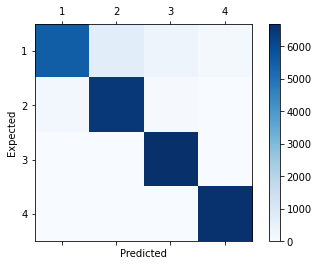

Accuracy 0.9460450497642745
              precision    recall  f1-score   support

           1       0.97      0.83      0.89      6638
           2       0.90      0.96      0.93      6733
           3       0.95      0.99      0.97      6736
           4       0.98      1.00      0.99      6619

    accuracy                           0.95     26726
   macro avg       0.95      0.95      0.94     26726
weighted avg       0.95      0.95      0.94     26726



In [24]:
classif_results()

# PCA

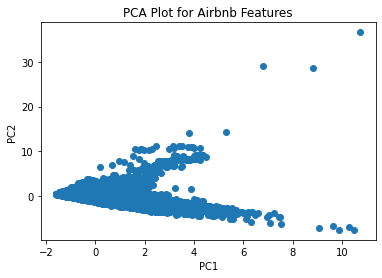

                                      PC1       PC2
latitude                        -0.234614  0.237657
longitude                        0.197812 -0.290804
minimum_nights                   0.146576  0.523514
number_of_reviews                0.424548 -0.291799
calculated_host_listings_count   0.268545  0.594263
availability_365                 0.691603  0.189719
distance to nearest subway (km)  0.392008 -0.332561


In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 
            'availability_365', 'distance to nearest subway (km)']
df_subset = df[features]

scaler = StandardScaler()
df_std = scaler.fit_transform(df_subset)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_std)

plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot for Airbnb Features')
plt.show()

loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=features)

print(loadings)